In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

In [12]:
data = pd.read_csv('data/elbow_method.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


### Clustering by language

In [13]:
df_map = data.copy()
df_map['Language'] = df_map['Language'].map({'English': 0, 'French': 1, 'German': 2})
df_map

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [14]:
x = df_map.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [15]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [16]:
clusters = kmeans.fit_predict(x)

In [17]:
clusters_df = df_map.copy()
clusters_df['Clusters'] = clusters
clusters_df

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


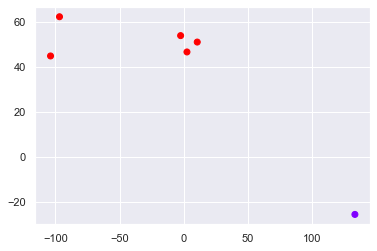

In [18]:
plt.scatter(clusters_df['Longitude'], clusters_df['Latitude'],c=clusters_df['Clusters'], cmap = 'rainbow')
plt.show()

## Elbow method - selecting the number of clusters

### WCSS (within-clusters sum of squares)

In [19]:
kmeans.inertia_

13208.958119999996

In [20]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

E:\Miniconda\Udemy\env\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

### Let's plot the results

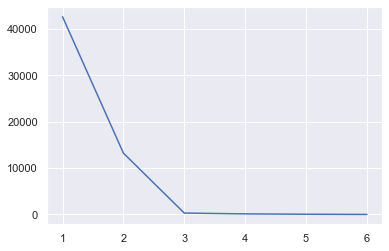

In [22]:
clusters_number = range(1,7)
plt.plot(clusters_number, wcss)

 We can see that the optimal number of clusters is 3.